In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [3]:
# X's & Y Split
Y = data['censor']
X = data.drop(columns=['censor'])

In [4]:
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=2021)
print(">>>> # of Train data : {}".format(len(train_idx)))
print(">>>> # of valid data : {}".format(len(valid_idx)))
print(">>>> # of Train data Y : {}".format(Counter(Y.iloc[train_idx])))
print(">>>> # of valid data Y : {}".format(Counter(Y.iloc[valid_idx])))

>>>> # of Train data : 372
>>>> # of valid data : 160
>>>> # of Train data Y : Counter({0: 241, 1: 131})
>>>> # of valid data Y : Counter({0: 110, 1: 50})


In [5]:
# GBM Hyperparameter
estimators = [10, 20, 50]
learning = [0.05, 0.1, 0.5]
subsam = [0.5, 0.75, 1]

# Modeling
save_est = []
save_lr = []
save_sub = []
f1_score_ = []

cnt = 0
for est in estimators:
    for lr in learning:
        for sub in subsam:
            print(">>> {} <<<".format(cnt))
            cnt += 1
            print("Number of Estimators : {}, Learning Rate : {}, Subsample : {}".format(est, lr, sub))
            
            model = GradientBoostingClassifier(n_estimators=est, 
                                               learning_rate=lr, 
                                               subsample=sub,
                                               random_state=119)
            model.fit(X.iloc[train_idx], Y.iloc[train_idx])

            # Train Acc
            y_pre_train = model.predict(X.iloc[train_idx])
            cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
            print("Train Confusion Matrix")
            print(cm_train)
            print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
            print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

            # Test Acc
            y_pre_test = model.predict(X.iloc[valid_idx])
            cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
            print("Test Confusion Matrix")
            print(cm_test)
            print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
            print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))
            print("-----------------------------------------------------------------------")
            print("-----------------------------------------------------------------------")
            save_est.append(est)
            save_lr.append(lr)
            save_sub.append(sub)
            f1_score_.append(f1_score(Y.iloc[valid_idx], y_pre_test))

>>> 0 <<<
Number of Estimators : 10, Learning Rate : 0.05, Subsample : 0.5
Train Confusion Matrix
[[240   1]
 [ 51  80]]
Train Acc : 0.8602150537634409
Train F1-Score : 0.7547169811320754
Test Confusion Matrix
[[102   8]
 [ 12  38]]
TesT Acc : 0.875
Test F1-Score : 0.7916666666666667
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 1 <<<
Number of Estimators : 10, Learning Rate : 0.05, Subsample : 0.75
Train Confusion Matrix
[[240   1]
 [ 53  78]]
Train Acc : 0.8548387096774194
Train F1-Score : 0.7428571428571428
Test Confusion Matrix
[[105   5]
 [ 13  37]]
TesT Acc : 0.8875
Test F1-Score : 0.8043478260869565
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 2 <<<
Number of Estimators : 10, Learning Rate : 0.05, Subsample : 1
Train Confusion Matrix
[[237   4]
 [ 40  91]]
Train Acc : 0.8817204

In [6]:
print(">>> {} <<<\nBest Test f1-score : {}\nBest n_estimators : {}\nBest SubSampling : {}\nBest Learning Rate : {}".format(np.argmax(f1_score_),
                                                                                                                           f1_score_[np.argmax(f1_score_)], 
                                                                                                                           save_est[np.argmax(f1_score_)],
                                                                                                                           save_sub[np.argmax(f1_score_)],
                                                                                                                           save_lr[np.argmax(f1_score_)]))

>>> 10 <<<
Best Test f1-score : 0.8807339449541285
Best n_estimators : 20
Best SubSampling : 0.75
Best Learning Rate : 0.05


In [7]:
best_model = GradientBoostingClassifier(n_estimators=save_est[np.argmax(f1_score_)], 
                                        learning_rate=save_lr[np.argmax(f1_score_)],
                                        subsample = save_sub[np.argmax(f1_score_)], 
                                        random_state=119)
best_model.fit(X.iloc[train_idx], Y.iloc[train_idx])

# Train Acc
y_pre_train = best_model.predict(X.iloc[train_idx])
cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
print("Train Confusion Matrix")
print(cm_train)
print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

# Test Acc
y_pre_test = best_model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
print("Test Confusion Matrix")
print(cm_test)
print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))

Train Confusion Matrix
[[233   8]
 [ 22 109]]
Train Acc : 0.9193548387096774
Train F1-Score : 0.8790322580645161
Test Confusion Matrix
[[99 11]
 [ 2 48]]
TesT Acc : 0.91875
Test F1-Score : 0.8807339449541285


In [8]:
feature_map = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns), reverse=True), columns=['Score', 'Feature'])
print(feature_map)

       Score  Feature
0   0.671843    event
1   0.066129    cd496
2   0.058819        r
3   0.046942     wtkg
4   0.041666  preanti
5   0.033353    cd420
6   0.017538     cd80
7   0.015869     race
8   0.015430      age
9   0.012291      z30
10  0.008892     cd40
11  0.006452   karnof
12  0.001685    strat
13  0.001652     homo
14  0.001437     str2
15  0.000000   zprior
16  0.000000  symptom
17  0.000000   oprior
18  0.000000     hemo
19  0.000000   gender
20  0.000000    drugs
21  0.000000    cd820


/var/folders/h2/dxdwtry542514hp51hkrx__h0000gn/T/ipykernel_15616/1559035209.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 40}` instead.

  sns.barplot(x="Score", y="Feature", data=feature_map_20.sort_values(by="Score", ascending=False), errwidth=40)


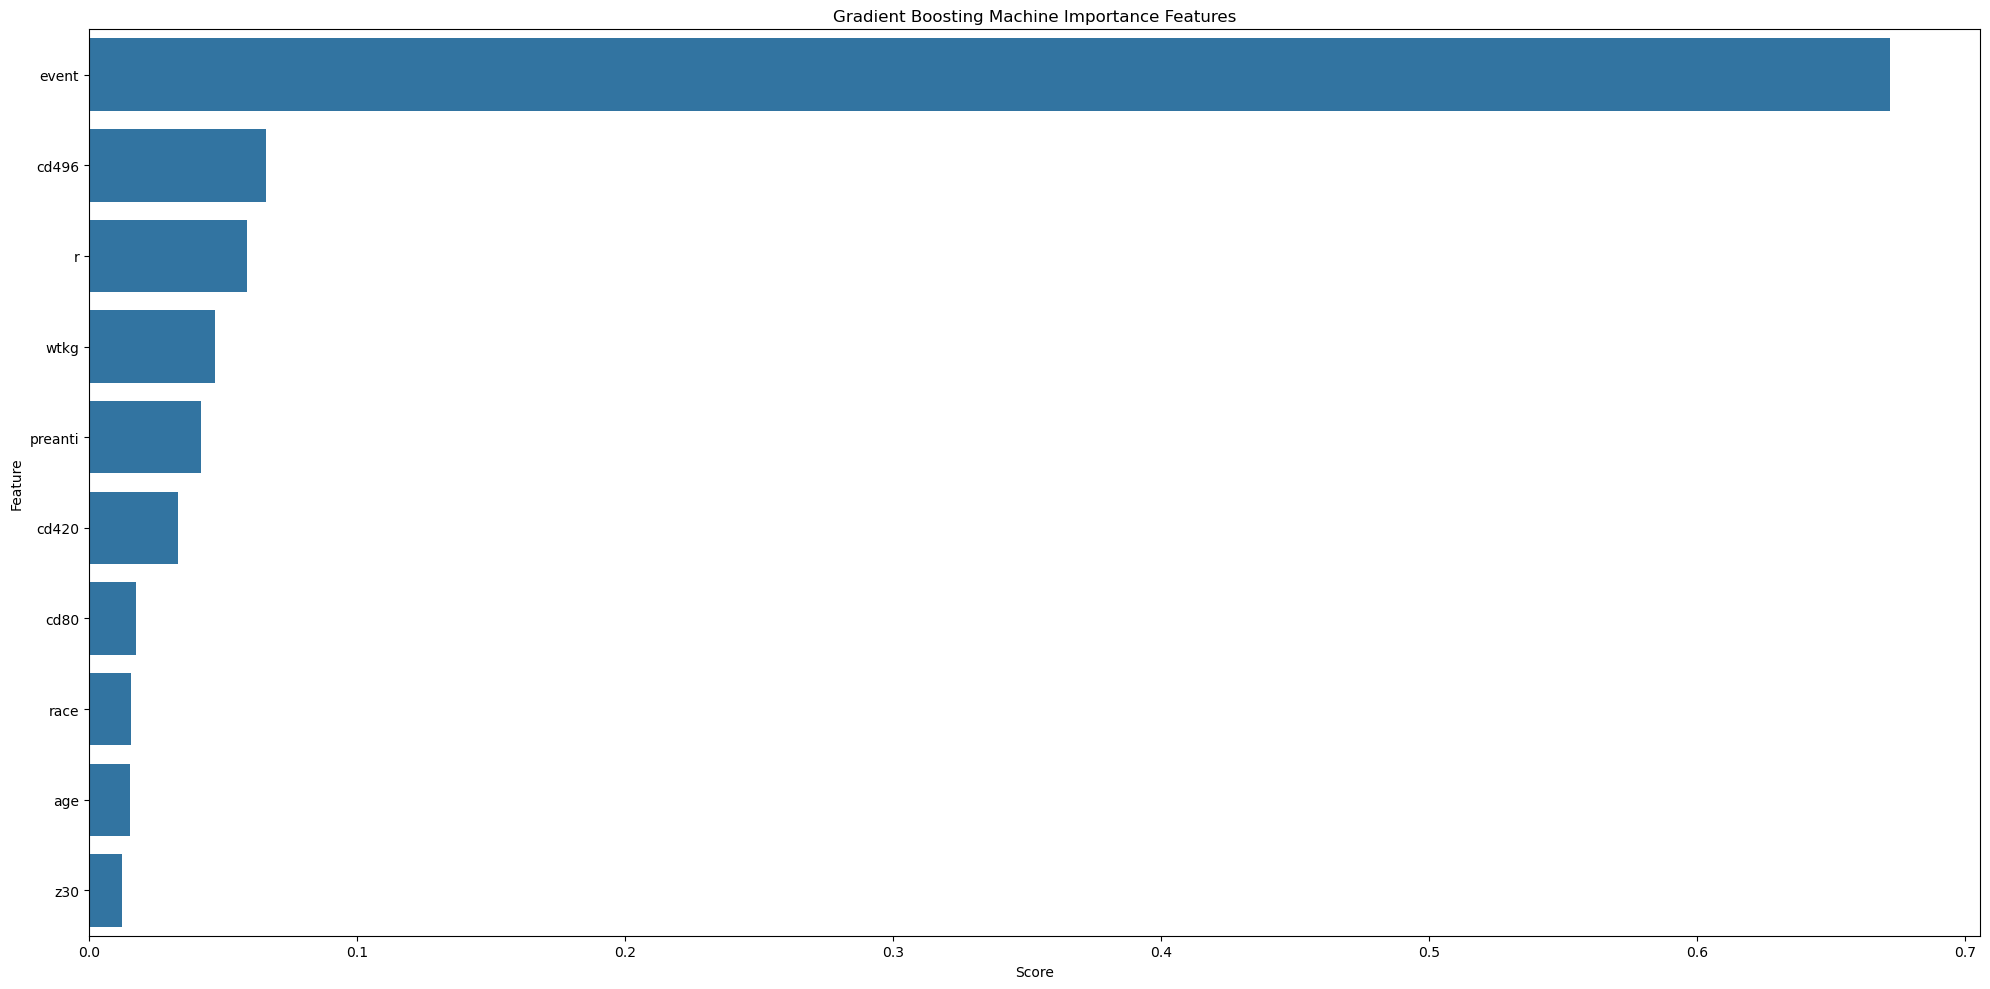

In [9]:
# Importance Score Top 10
feature_map_20 = feature_map.iloc[:10]
plt.figure(figsize=(20, 10))
sns.barplot(x="Score", y="Feature", data=feature_map_20.sort_values(by="Score", ascending=False), errwidth=40)
plt.title('Gradient Boosting Machine Importance Features')
plt.tight_layout()
plt.show()